In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
import seaborn as sns

EXPLORING THE DATASET

About Dataset
PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed while constructing the dataset are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.

Class Labels
Label 1 corresponds to a legitimate URL, label 0 to a phishing URL

In [3]:
df = pd.read_csv(r'C:\Users\emman\OneDrive\Documents\Robiat\phiusiil+phishing+url+dataset.zip')

In [4]:
df.shape

(235795, 56)

In [5]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
df.DomainTitleMatchScore

0           0.000000
1          55.555556
2          46.666667
3           0.000000
4         100.000000
             ...    
235790    100.000000
235791      0.000000
235792    100.000000
235793      0.000000
235794    100.000000
Name: DomainTitleMatchScore, Length: 235795, dtype: float64

In [7]:
df.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [8]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [9]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [11]:
df.label.value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [12]:
df1 = df.copy()

## EXPLORATIVE DATA ANALYSIS


This involves looking at the different columns and how they correlate with the label/target column to let us have an idea of relevant columns used in determining phishing websites. Due to the number of features used in this dataset the EDA necessary will be very harsh on features needed to be dropped.



In [13]:
df2 = df1.drop("FILENAME", axis=1)

string_columns = df1.select_dtypes(include='object').columns.tolist()

df2 = df1.drop(string_columns,axis=1)


In [14]:
correlations = df2.corr()['label'].sort_values(ascending=False)
print(correlations)


label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit         0.167574
HasPasswordField         

From the above list of correlations we can see that there are a lot of promising columns and due to the variety of columns we will only be working with columns that have above 0.5 correlation with the target column or below -0.5 correlation with the target column but this is only after we check for the categorical columns involved with 0 and 1 because the .corr() function does not cover this.


Text(0.5, 0, '% with that were phished')

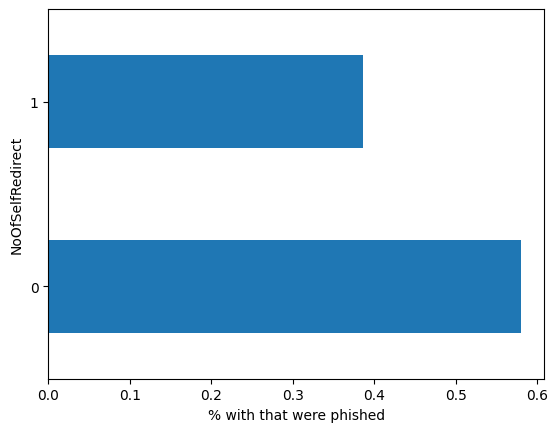

In [15]:
df1.groupby('NoOfSelfRedirect').label.mean().plot(kind='barh').set_xlabel('% with that were phished')


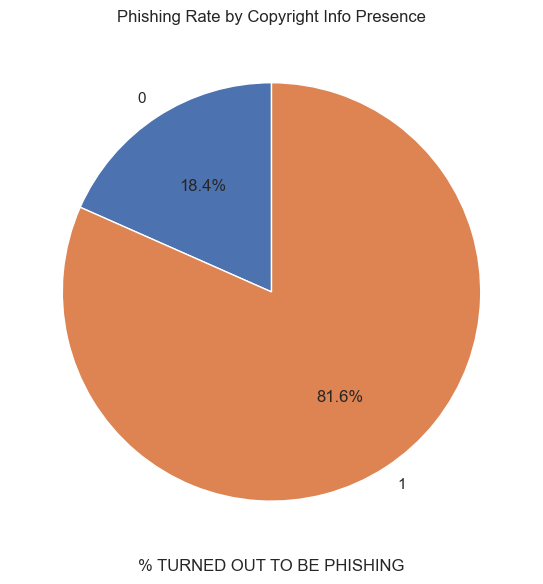

In [16]:
sns.set_theme(style="whitegrid")

# Calculate the mean phishing rate for each 'HasCopyrightInfo' group
data = df1.groupby('HasCopyrightInfo').label.mean()
# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.xlabel('% TURNED OUT TO BE PHISHING')
plt.title('Phishing Rate by Copyright Info Presence')
plt.tight_layout()
plt.show()

### Insight: Copyright Info and Phishing

From the data, 81.6% of the 235,794 website URLs with copyright info were not phishing sites. 

This is likely because phishing kits often can not copy legitimate websites, including footers with copyright notices, to appear authentic. This signifies trust, and is actually a tactic to ensure the users make the right choices as to where to leave their digital footprint and avoid potential red flags. 


In [17]:

binary_columns = []

for col in df1.columns:
    if col.startswith('No'):
        # Convert "No..." columns to int64
        df1[col] = df1[col].astype('int64')
    else:
        if df1[col].dtype in ['object', 'int64', 'bool']:
            unique_vals = df1[col].dropna().unique()
            if set(unique_vals).issubset({0, 1}):
                binary_columns.append(col)
                df1[col] = df1[col].astype('bool')



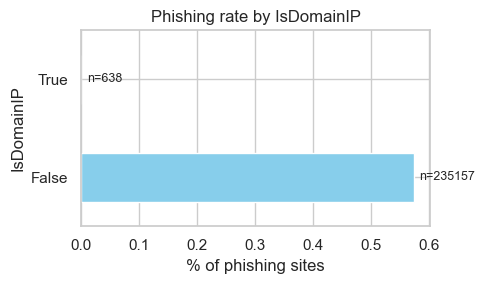

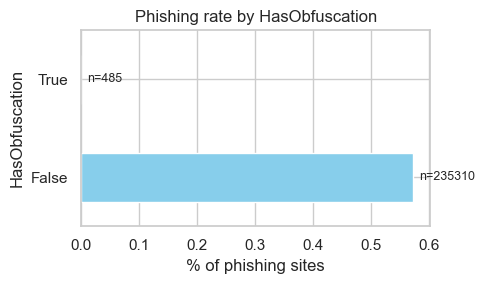

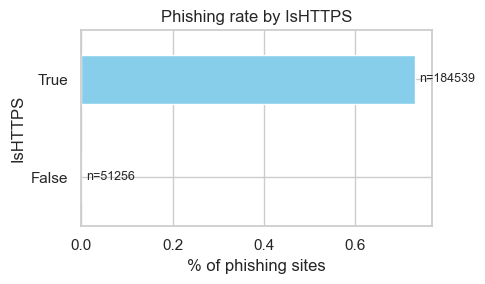

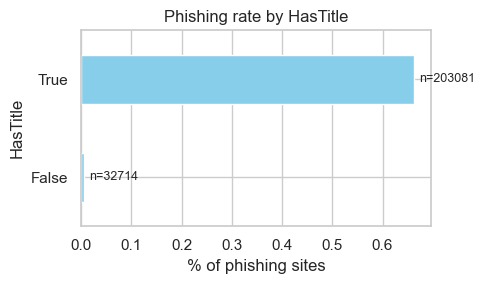

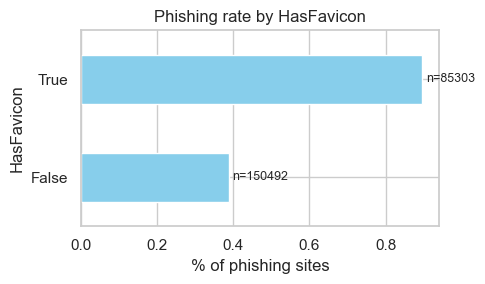

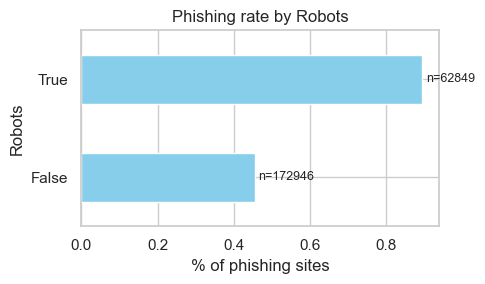

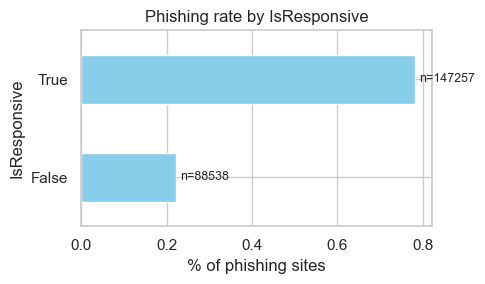

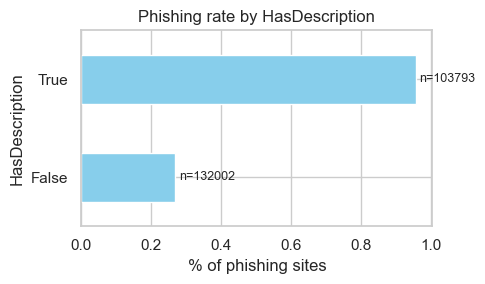

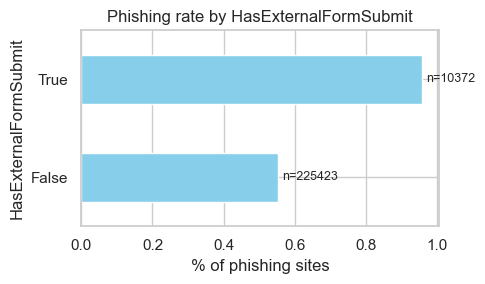

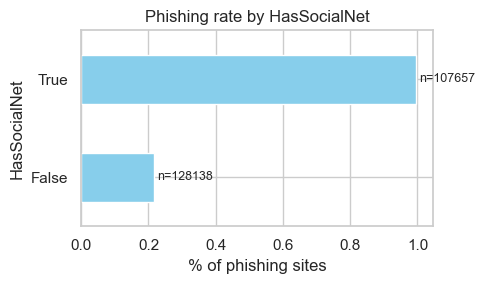

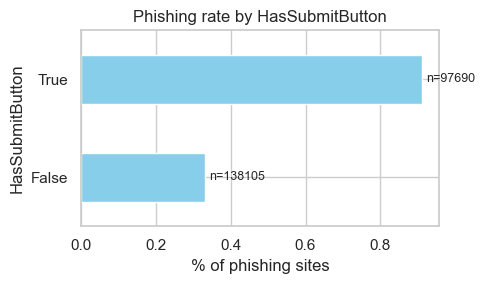

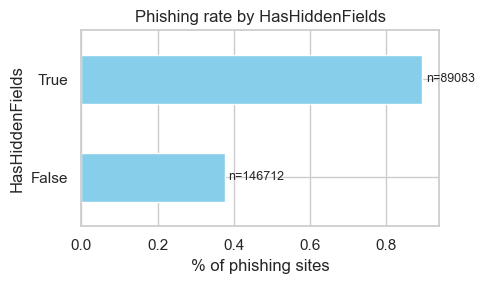

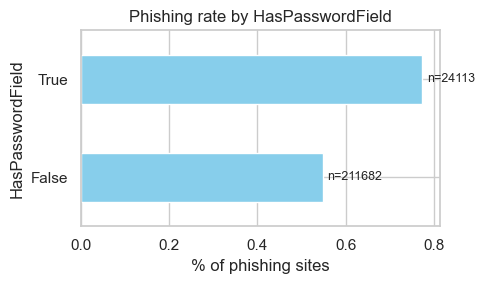

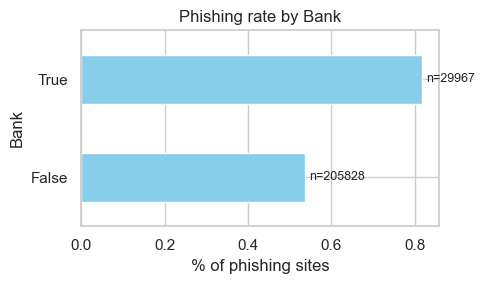

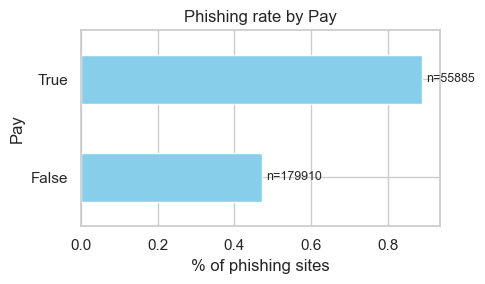

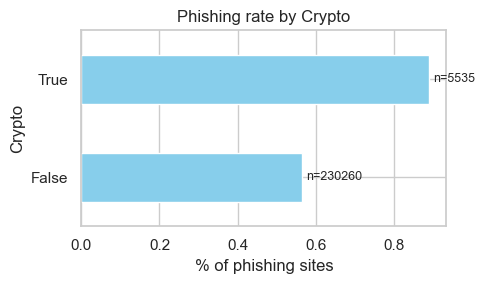

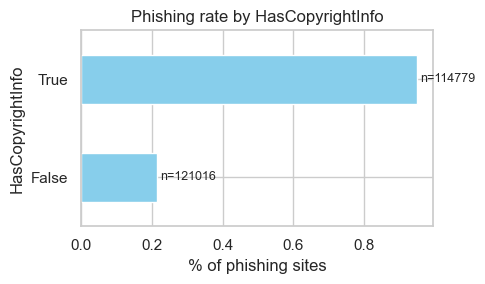

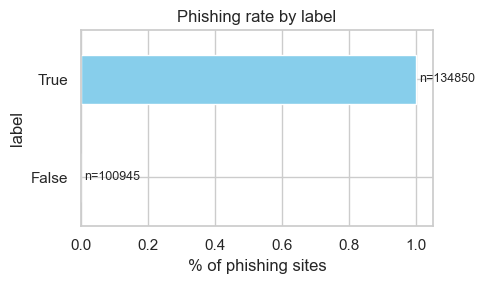

In [18]:

for col in binary_columns:
    plt.figure(figsize=(5, 3))

    # Compute phishing rate by binary column
    phishing_rate = df1.groupby(col).label.mean()

    # Compute value counts for annotation
    value_counts = df1[col].value_counts()

    # Plot
    phishing_rate.plot(kind='barh', color='skyblue')

    # Add value count annotations to each bar
    for i, (value, rate) in enumerate(phishing_rate.items()):
        count = value_counts.get(value, 0)
        plt.text(rate + 0.01, i, f'n={count}', va='center', fontsize=9)

    plt.xlabel('% of phishing sites')
    plt.title(f'Phishing rate by {col}')
    plt.tight_layout()
    plt.show()


We can see that from the above code that the feature IsDomain IP is suffering from class inbalance and therefore we can not use this column any further for our data analysis for now unless we add synthetic data to the dataset which is unnecessary. The same can not exactly be said for the HAStitle column which has an inbalance but due to the fact that the column itself is useful in phishing detection by logical reasoning we can say otherwise

The same analysis can be said for IsHTTPS in the sense that we can say that it would logically make sense that a secure site would use https and not http but there are still cases where the latter is actually a legit website therefore this column will not be dropped.

In [19]:
for i in binary_columns:
    print(f'Value counts and phishing rates for column: {i}')
    print('Value Counts:')
    print(df1[i].value_counts())
    print('\nPhishing Rates in %:')
    print(df1.groupby(i).label.mean()*100)
    print()  # Just to add a blank line between outputs


Value counts and phishing rates for column: IsDomainIP
Value Counts:
IsDomainIP
False    235157
True        638
Name: count, dtype: int64

Phishing Rates in %:
IsDomainIP
False    57.344668
True      0.000000
Name: label, dtype: float64

Value counts and phishing rates for column: HasObfuscation
Value Counts:
HasObfuscation
False    235310
True        485
Name: count, dtype: int64

Phishing Rates in %:
HasObfuscation
False    57.307382
True      0.000000
Name: label, dtype: float64

Value counts and phishing rates for column: IsHTTPS
Value Counts:
IsHTTPS
True     184539
False     51256
Name: count, dtype: int64

Phishing Rates in %:
IsHTTPS
False     0.000000
True     73.073984
Name: label, dtype: float64

Value counts and phishing rates for column: HasTitle
Value Counts:
HasTitle
True     203081
False     32714
Name: count, dtype: int64

Phishing Rates in %:
HasTitle
False     0.513542
True     66.319350
Name: label, dtype: float64

Value counts and phishing rates for column: HasFavi

In [20]:
final_features = [
    # Strong categorical predictors (from phishing rate analysis)
    'HasSocialNet',
    'HasDescription',
    'HasCopyrightInfo',
    'HasSubmitButton',
    'HasFavicon',
    'Pay',
    'HasHiddenFields',
    'IsResponsive',
    'IsHTTPS',
    'Crypto',

    # Positively correlated numerical predictors
    'DomainTitleMatchScore',
    'URLTitleMatchScore',
    'URLCharProb',
    'CharContinuationRate',

    # Strong negatively correlated numerical predictor
    'SpacialCharRatioInURL'
]


# ENCODING STRING COLUMNS #

The above columns are selected either based on categorical numbers or continous numbers with good relationship with the target column but for string columns like TLD where by based on current trends we can say that a site with a less popular or common tld has more likelyhood to be a phishing site hence the appropriate encoding for this column will be target/frequency encoding

This will ensure that the sites with the least common domain will be noticed and the sites with a more common domain are less likely to not be noticed/flagged

In [21]:
tld_encoding = df1.groupby('TLD')['label'].mean()
df1['TLD_encoded'] = df1['TLD'].map(tld_encoding)

In [22]:
final_features.append('TLD_encoded')

In [23]:
model_df1 = df.copy()

In [24]:
tld_encoding = df.groupby('TLD')['label'].mean()
df['TLD_encoded'] = df['TLD'].map(tld_encoding)

In [25]:
model_df1 = df[final_features]

In [ ]:
model_df1.shape

(235795, 16)

In [28]:
model_df1.head()

,HasSocialNet,HasDescription,HasCopyrightInfo,HasSubmitButton,HasFavicon,Pay,HasHiddenFields,IsResponsive,IsHTTPS,Crypto,DomainTitleMatchScore,URLTitleMatchScore,URLCharProb,CharContinuationRate,SpacialCharRatioInURL,TLD_encoded
0,0,0,1,1,0,0,1,1,1,0,0.000000,0.000000,0.061933,1.000000,0.032,0.611129
1,1,0,1,1,1,0,0,0,1,0,55.555556,55.555556,0.050207,0.666667,0.087,0.828328
2,0,1,1,1,0,0,1,1,1,0,46.666667,46.666667,0.064129,0.866667,0.069,0.949648
3,1,0,1,1,0,1,1,1,1,1,0.000000,0.000000,0.057606,1.000000,0.038,0.611129
4,1,1,1,1,0,1,1,1,1,0,100.000000,100.000000,0.059441,1.000000,0.030,0.879264


In [29]:
model_df1.dtypes

HasSocialNet               int64
HasDescription             int64
HasCopyrightInfo           int64
HasSubmitButton            int64
HasFavicon                 int64
Pay                        int64
HasHiddenFields            int64
IsResponsive               int64
IsHTTPS                    int64
Crypto                     int64
DomainTitleMatchScore    float64
URLTitleMatchScore       float64
URLCharProb              float64
CharContinuationRate     float64
SpacialCharRatioInURL    float64
TLD_encoded              float64
dtype: object

## Model Building and Hyperparameter tuning ##

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [31]:
x= model_df1
y= df['label']
look = pd.concat([x, y], axis=1)
look.head()

,HasSocialNet,HasDescription,HasCopyrightInfo,HasSubmitButton,HasFavicon,Pay,HasHiddenFields,IsResponsive,IsHTTPS,Crypto,DomainTitleMatchScore,URLTitleMatchScore,URLCharProb,CharContinuationRate,SpacialCharRatioInURL,TLD_encoded,label
0,0,0,1,1,0,0,1,1,1,0,0.000000,0.000000,0.061933,1.000000,0.032,0.611129,1
1,1,0,1,1,1,0,0,0,1,0,55.555556,55.555556,0.050207,0.666667,0.087,0.828328,1
2,0,1,1,1,0,0,1,1,1,0,46.666667,46.666667,0.064129,0.866667,0.069,0.949648,1
3,1,0,1,1,0,1,1,1,1,1,0.000000,0.000000,0.057606,1.000000,0.038,0.611129,1
4,1,1,1,1,0,1,1,1,1,0,100.000000,100.000000,0.059441,1.000000,0.030,0.879264,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)#1-----0 e.g 0.9
lr_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

In [34]:
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model)
    ],
    voting ='soft'
)

In [35]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [36]:
y_pred = ensemble_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9941262537373566

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20189
           1       0.99      0.99      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



In [37]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

## Ensemble Model 2 ##
Option 1: CatBoost in a Voting Classifier

In [45]:
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Initialize models
rf_model2 = RandomForestClassifier(n_estimators=3, max_depth=1, random_state=42)
lr_model2 = LogisticRegression(max_iter=10, solver='liblinear', random_state=12)
catboost_model1 = CatBoostClassifier(verbose=0, random_state=42)


Parameters will be tuned with sklearn metrics and a very confined grid to make sure that the model thinks as hard as it can without relying too much on the coherent features but still gives an accurate response 

In [46]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
param_grid = {
    'depth': [1, 2],
    'learning_rate': [0.1,0.2, 0.3,0.5],
    'iterations': [10,15,20,50, 75, 100]
}

results = []

for params in ParameterGrid(param_grid):
    model = CatBoostClassifier(verbose=0, random_state=42, **params)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results.append((params, acc))

# Show models below 91%
for params, acc in results:
    print(f"[Checked] Params: {params}, Accuracy: {acc:.4f}")
  

[Checked] Params: {'depth': 1, 'iterations': 10, 'learning_rate': 0.1}, Accuracy: 0.9361
[Checked] Params: {'depth': 1, 'iterations': 10, 'learning_rate': 0.2}, Accuracy: 0.9575
[Checked] Params: {'depth': 1, 'iterations': 10, 'learning_rate': 0.3}, Accuracy: 0.9715
[Checked] Params: {'depth': 1, 'iterations': 10, 'learning_rate': 0.5}, Accuracy: 0.9797
[Checked] Params: {'depth': 1, 'iterations': 15, 'learning_rate': 0.1}, Accuracy: 0.9573
[Checked] Params: {'depth': 1, 'iterations': 15, 'learning_rate': 0.2}, Accuracy: 0.9717
[Checked] Params: {'depth': 1, 'iterations': 15, 'learning_rate': 0.3}, Accuracy: 0.9797
[Checked] Params: {'depth': 1, 'iterations': 15, 'learning_rate': 0.5}, Accuracy: 0.9864
[Checked] Params: {'depth': 1, 'iterations': 20, 'learning_rate': 0.1}, Accuracy: 0.9588
[Checked] Params: {'depth': 1, 'iterations': 20, 'learning_rate': 0.2}, Accuracy: 0.9762
[Checked] Params: {'depth': 1, 'iterations': 20, 'learning_rate': 0.3}, Accuracy: 0.9864
[Checked] Params: {'d

Introducing the catboost model known for it's usefulness in binary classification can enhance robustness of the model and give a different perspective accruacy wise  to ensure overfitting. Parameters shall tuned low to ensure the model makes up for the specificity of the features selected and their direct coherance with real world  phishing.


In [ ]:
catboost_model2 = CatBoostClassifier(learning_rate= 0.1,depth=1,iterations=10,verbose=0, random_state=42)


In [48]:
ensemble_model2 = VotingClassifier(
    estimators=[
        ('rf', rf_model2),
        ('lr', lr_model2),
        ('cb', catboost_model2)
    ],
    voting='soft'
)

In [49]:
ensemble_model2.fit(X_train, y_train)


c:\Users\emman\OneDrive\Documents\Robiat\robiat\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=1,
                                                     n_estimators=3,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=10, random_state=12,
                                                 solver='liblinear')),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x000001DCE1C5F450>)],
                 voting='soft')

In [50]:
y_pred2 = ensemble_model2.predict(X_test)

print("voting Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))


voting Accuracy: 0.9594138976653449

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     20189
           1       0.97      0.96      0.96     26970

    accuracy                           0.96     47159
   macro avg       0.96      0.96      0.96     47159
weighted avg       0.96      0.96      0.96     47159



In [ ]:
import joblib

# Save
joblib.dump( ensemble_model2, 'phishing_model.pkl')




['phishing_model.pkl']

## MODEL PERFORMANCE ANALYSIS

0:	learn: 0.6678768	test: 0.6677714	best: 0.6677714 (0)	total: 66.2ms	remaining: 19.8s
10:	learn: 0.4433078	test: 0.4426844	best: 0.4426844 (10)	total: 317ms	remaining: 8.32s
20:	learn: 0.3153704	test: 0.3145491	best: 0.3145491 (20)	total: 506ms	remaining: 6.72s
30:	learn: 0.2288213	test: 0.2280111	best: 0.2280111 (30)	total: 696ms	remaining: 6.04s
40:	learn: 0.1796274	test: 0.1788488	best: 0.1788488 (40)	total: 882ms	remaining: 5.57s
50:	learn: 0.1509972	test: 0.1502882	best: 0.1502882 (50)	total: 1.06s	remaining: 5.17s
60:	learn: 0.1240468	test: 0.1234690	best: 0.1234690 (60)	total: 1.25s	remaining: 4.88s
70:	learn: 0.1022819	test: 0.1017804	best: 0.1017804 (70)	total: 1.44s	remaining: 4.64s
80:	learn: 0.0891330	test: 0.0886900	best: 0.0886900 (80)	total: 1.62s	remaining: 4.39s
90:	learn: 0.0797075	test: 0.0793087	best: 0.0793087 (90)	total: 1.81s	remaining: 4.15s
100:	learn: 0.0728174	test: 0.0724440	best: 0.0724440 (100)	total: 1.99s	remaining: 3.92s
110:	learn: 0.0670928	test: 0.0

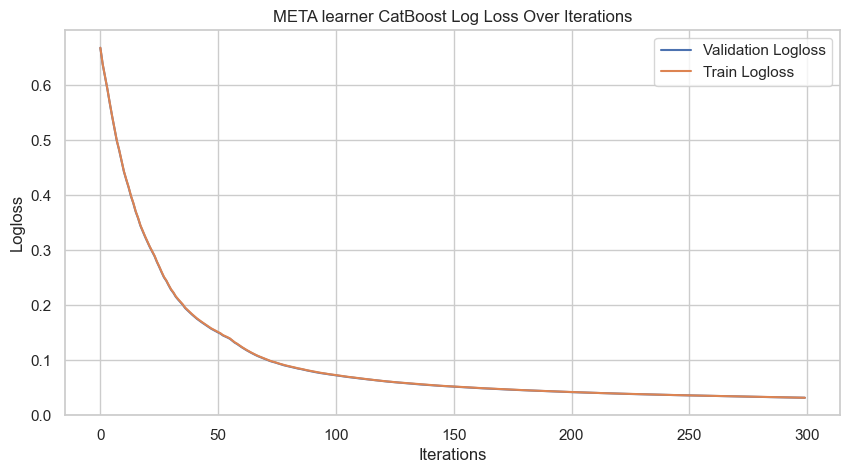

In [ ]:
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

cb = CatBoostClassifier(learning_rate=0.1, depth=1, iterations=10, verbose=0, random_state=42)

cb.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=10)

# Plot log loss
plt.figure(figsize=(10, 5))
plt.plot(cb.evals_result_['validation']['Logloss'], label='Validation Logloss')
plt.plot(cb.evals_result_['learn']['Logloss'], label='Train Logloss')
plt.title('META learner CatBoost Log Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()
plt.grid(True)
plt.show()


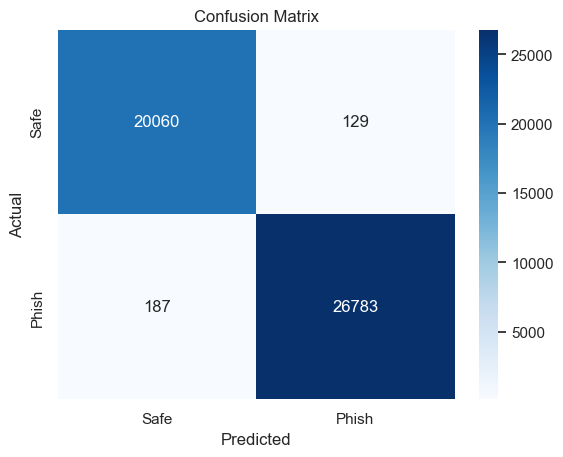

In [452]:

cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phish'], yticklabels=['Safe', 'Phish'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [284]:
features = X_train.columns

df_importance2 = pd.DataFrame({
    'Feature': features,
    'Random Forest Importance': rf_importances,
    'Logistic Regression Coefficient': lr_importances,
    'CatBoost Importance': cb_importances
})

# Optional: Normalize each column for fair comparison
for col in df_importance2.columns[1:]:
    df_importance2[col] = df_importance2[col] / df_importance2[col].max()


In [285]:
df_importance2

,Feature,Random Forest Importance,Logistic Regression Coefficient,CatBoost Importance
0,HasSocialNet,1.000000,0.203509,0.436469
1,HasDescription,0.656522,0.117293,0.102765
2,HasCopyrightInfo,0.880827,0.106226,0.092114
3,HasSubmitButton,0.246584,0.034134,0.011815
4,HasFavicon,0.075331,0.027885,0.004175
5,Pay,0.008659,0.001212,0.000000
6,HasHiddenFields,0.087177,0.042371,0.014782
7,IsResponsive,0.099466,0.002873,0.002137
8,IsHTTPS,0.415384,0.332244,1.000000
9,Crypto,0.001883,0.025315,0.000000


In [177]:
df_importance2['Average_Importance'] = df_importance2[
    ['Random Forest Importance', 'Logistic Regression Coefficient', 'CatBoost Importance']
].mean(axis=1)

df_importance2.sort_values('Average_Importance', ascending=False, inplace=True)


In [178]:
df_importance2

,Feature,Random Forest Importance,Logistic Regression Coefficient,CatBoost Importance,Average_Importance
10,URLSimilarityIndex,1.000000,0.042577,1.000000,0.680859
0,HasSocialNet,0.583177,0.669198,0.023770,0.425382
8,IsHTTPS,0.106529,1.000000,0.059100,0.388543
15,SpacialCharRatioInURL,0.048869,0.887499,0.011572,0.315980
2,HasCopyrightInfo,0.403340,0.400818,0.024381,0.276180
14,CharContinuationRate,0.012421,0.647733,0.003151,0.221102
1,HasDescription,0.195732,0.390162,0.019335,0.201743
16,TLD_encoded,0.035047,0.535445,0.007722,0.192738
3,HasSubmitButton,0.101839,0.189186,0.008610,0.099878
13,URLCharProb,0.015331,0.222258,0.003251,0.080280


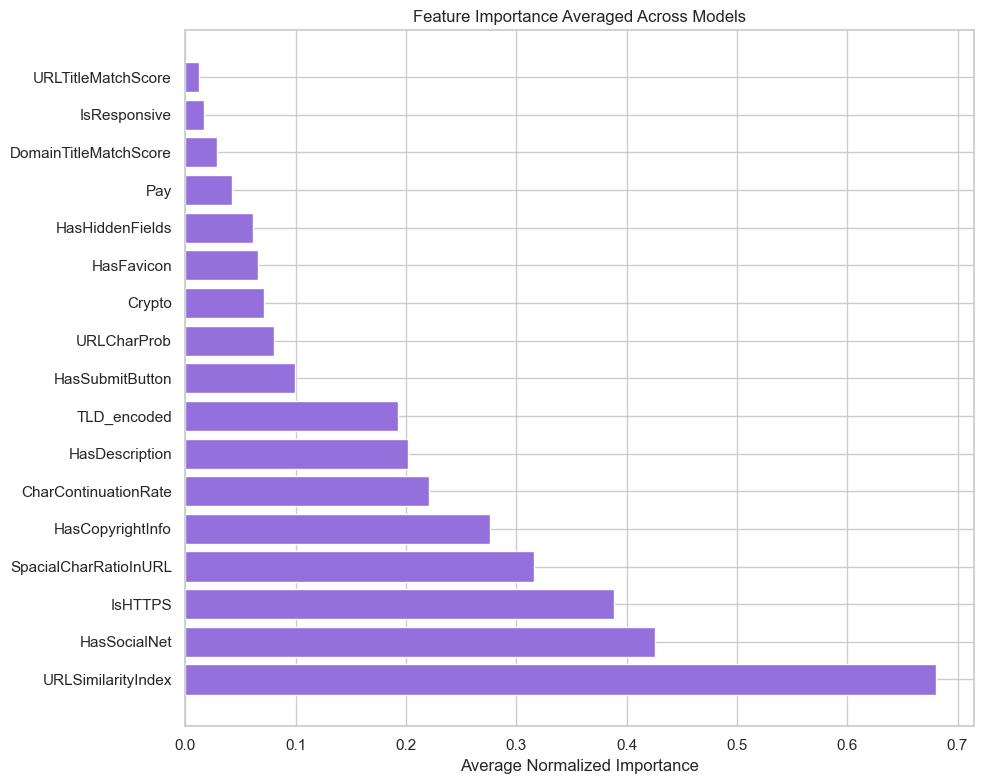

In [179]:
plt.figure(figsize=(10, 8))
plt.barh(df_importance2['Feature'], df_importance2['Average_Importance'], color='mediumpurple')
plt.xlabel("Average Normalized Importance")
plt.title("Feature Importance Averaged Across Models")
plt.tight_layout()
plt.show()

## Feature Extraction Pipeline

In [180]:
import re
import requests
from bs4 import BeautifulSoup
import tldextract
from difflib import SequenceMatcher
from urllib.parse import urlparse

In [181]:
df4 = df1[['TLD', 'TLD_encoded']].drop_duplicates().sort_values('TLD')
df4.to_csv("tld_dict.csv", index=False)
TLD_PHISHING_RATE = df4.set_index('TLD')['TLD_encoded'].to_dict()


In [182]:
TLD_PHISHING_RATE.get('co.uk', 0.0)


0.0

In [183]:
print(TLD_PHISHING_RATE)

{'100': 0.0, '101': 0.0, '103': 0.0, '106': 0.0, '107': 0.0, '108': 0.0, '11': 0.0, '110': 0.0, '111': 0.0, '116': 0.0, '117': 0.0, '12': 0.0, '120': 0.0, '121': 0.0, '123': 0.0, '125': 0.0, '126': 0.0, '126:8080': 0.0, '128': 0.0, '13': 0.0, '130': 0.0, '133:8080': 0.0, '134': 0.0, '136': 0.0, '14': 0.0, '140': 0.0, '145': 0.0, '146': 0.0, '148': 0.0, '149': 0.0, '15': 0.0, '150': 0.0, '151': 0.0, '154': 0.0, '155': 0.0, '158': 0.0, '160': 0.0, '161': 0.0, '162': 0.0, '163': 0.0, '165': 0.0, '166': 0.0, '167': 0.0, '171': 0.0, '173': 0.0, '177': 0.0, '178': 0.0, '181': 0.0, '182': 0.0, '184': 0.0, '185': 0.0, '187': 0.0, '188:10003': 0.0, '189': 0.0, '196': 0.0, '197': 0.0, '198': 0.0, '199': 0.0, '20': 0.0, '200': 0.0, '203': 0.0, '206': 0.0, '21': 0.0, '210': 0.0, '211': 0.0, '211:8383': 0.0, '214': 0.0, '216': 0.0, '220': 0.0, '221': 0.0, '222': 0.0, '223': 0.0, '225': 0.0, '227': 0.0, '230': 0.0, '231': 0.0, '232': 0.0, '233': 0.0, '234': 0.0, '235': 0.0, '237': 0.0, '238': 0.0, '

In [184]:
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def fetch_page(url):
    """Fetch page content with realistic user-agent, retries, and timeout."""
    headers = {
        'User-Agent': (
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
            'AppleWebKit/537.36 (KHTML, like Gecko) '
            'Chrome/122.0.0.0 Safari/537.36'
        ),
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Connection': 'keep-alive'
    }

    session = requests.Session()
    retries = Retry(
        total=3,
        backoff_factor=2,
        status_forcelist=[429, 500, 502, 503, 504],
        allowed_methods=["GET"]
    )
    session.mount("https://", HTTPAdapter(max_retries=retries))

    try:
        response = session.get(url, headers=headers, timeout=30)
        if response.status_code == 200:
            return response.text
        else:
            print(f"⚠️ Warning: Status {response.status_code} for URL {url}")
    except requests.exceptions.Timeout:
        print(f"⏱️ Timeout: The request for {url} took too long.")
    except requests.RequestException as e:
        print(f"❌ Error fetching page {url}: {e}")
    
    return None


In [185]:
def has_keyword(text, keywords):
    """Check if any keyword is present in text (case-insensitive)."""
    if text:
        text_lower = text.lower()
        return any(kw in text_lower for kw in keywords)
    return False

In [186]:
def char_probability(url):
    """Estimate character distribution typicality in URL."""
    total = len(url)
    if total == 0:
        return 0
    special_chars = len(re.findall(r'[^a-zA-Z0-9]', url))
    return 1 - (special_chars / total)  # Higher means more normal characters

In [33]:
def char_continuation_rate(url):
    """Heuristic for repeated character sequences."""
    repeats = len(re.findall(r'(.)\1{2,}', url))  # 3+ repeated chars
    total = len(url)
    if total == 0:
        return 0
    return 1 - (repeats / total)

In [34]:
def spacial_char_ratio(url):
    """Ratio of special chars to total in URL."""
    total = len(url)
    specials = len(re.findall(r'[^a-zA-Z0-9]', url))
    if total == 0:
        return 0
    return specials / total

In [35]:
def similarity(a, b):
    """Levenshtein-based similarity ratio."""
    if not a or not b:
        return 0
    return SequenceMatcher(None, a, b).ratio()

In [36]:
def adjusted_similarity(a, b):
    score = similarity(a, b) * 100
    return 100 if score > 70 else score

In [37]:
def is_legit_domain(base_domain, url):
    try:
        parsed = urlparse(url)
        netloc = parsed.netloc.lower()
        if netloc.startswith("www."):
            netloc = netloc[4:]
        return 100 if netloc == base_domain.lower() else adjusted_similarity(base_domain, netloc)
    except:
        return 0

In [38]:
def extract_lexical_features(url, domain_title='', page_title=''):
    parsed = urlparse(url)
    domain = parsed.netloc.lower()
    full_url = url.lower()
    features = {
        'URLSimilarityIndex': is_legit_domain(domain, full_url),
        'DomainTitleMatchScore': adjusted_similarity(domain_title.lower(), domain) if domain_title else 0,
        'URLTitleMatchScore': adjusted_similarity(page_title.lower(), full_url) if page_title else 0,
        'URLCharProb': char_probability(full_url),
        'CharContinuationRate': char_continuation_rate(full_url),
        'SpacialCharRatioInURL': spacial_char_ratio(full_url)
    }
    return features

In [39]:

def extract_structural_features(html):
    """Extract HTML-structure-based features from a web page."""
    soup = BeautifulSoup(html, 'html.parser')

    # Detect presence of submit buttons
    has_submit_button = bool(soup.select('input[type="submit"], button[type="submit"], button'))

    # Detect hidden input fields
    has_hidden_fields = bool(soup.find_all('input', type='hidden'))

    # Detect favicon in various formats
    has_favicon = bool(soup.find('link', rel=lambda rel: rel and 'icon' in rel.lower()))

    # Detect viewport meta tag for responsiveness
    is_responsive = bool(soup.find('meta', attrs={'name': 'viewport'}))

    # Detect presence of meta description
    has_description = bool(soup.find('meta', attrs={'name': 'description'}))

    # Detect copyright notice
    footer = soup.find('footer')
    footer_text = footer.get_text(" ", strip=True).lower() if footer else ''
    has_copyright_info = 'copyright' in footer_text or '©' in footer_text

    return {
        'HasSubmitButton': has_submit_button,
        'HasHiddenFields': has_hidden_fields,
        'HasFavicon': has_favicon,
        'IsResponsive': is_responsive,
        'HasDescription': has_description,
        'HasCopyrightInfo': has_copyright_info
    }


In [40]:
# Extended keyword lists
CRYPTO_KEYWORDS = [
    'btc', 'bitcoin', 'eth', 'ethereum', 'crypto', 'blockchain',
    'coin', 'token', 'web3'
]

PAY_KEYWORDS = [
    'pay', 'shop', 'payment', 'checkout', 'card', 'bank',
    'securepay', 'paypal', 'visa', 'mastercard'
]

SOCIAL_KEYWORDS = [
    'facebook', 'twitter', 'instagram', 'linkedin', 'youtube'
]

def has_keyword(text, keywords):
    if not text:
        return False
    text = text.lower()
    return any(re.search(rf'\b{re.escape(kw)}\b', text) for kw in keywords)

def extract_categorical_features(url, html_text):
    """Extract keyword and scheme based binary features."""
    url_lower = url.lower()
    page_text = html_text.lower() if html_text else ''

    features = {
        'HasSocialNet': any(sk in url_lower for sk in SOCIAL_KEYWORDS) or any(sk in page_text for sk in SOCIAL_KEYWORDS),
        'Crypto': has_keyword(url_lower, CRYPTO_KEYWORDS) or has_keyword(page_text, CRYPTO_KEYWORDS),
        'Pay': has_keyword(url_lower, PAY_KEYWORDS) or has_keyword(page_text, PAY_KEYWORDS),
        'IsHTTPS': url_lower.startswith('https://')
    }
    return features


In [41]:
def encode_tld(url):
    """Map TLD to phishing rate or default 0."""
    ext = tldextract.extract(url)
    tld = ext.suffix.lower()
    return TLD_PHISHING_RATE.get(tld, 0.0)

In [42]:
def extract_features(url):
    """Complete feature extraction pipeline for a single URL."""
    html = fetch_page(url)
    page_title = ''
    domain_title = ''
    if html:
        soup = BeautifulSoup(html, 'html.parser')
        page_title = soup.title.string if soup.title else ''
        domain_title_tag = soup.find('title')
        domain_title = domain_title_tag.string if domain_title_tag else ''
    lexical = extract_lexical_features(url, domain_title, page_title)
    structural = extract_structural_features(html) if html else {
        'HasSubmitButton':0, 'HasHiddenFields':0, 'HasFavicon':0,
        'IsResponsive':0, 'HasDescription':0, 'HasCopyrightInfo':0
    }
    categorical = extract_categorical_features(url, html)
    tld_encoded = encode_tld(url)
    features = {**categorical, **structural, **lexical, 'TLD_encoded': tld_encoded}
    feature_order = [
        'HasSocialNet', 'HasDescription', 'HasCopyrightInfo', 'HasSubmitButton',
        'HasFavicon', 'Pay', 'HasHiddenFields', 'IsResponsive', 'IsHTTPS', 'Crypto',
        'URLSimilarityIndex', 'DomainTitleMatchScore', 'URLTitleMatchScore',
        'URLCharProb', 'CharContinuationRate', 'SpacialCharRatioInURL',
        'TLD_encoded'
    ]
    feature_vector = [features.get(f, 0) for f in feature_order]
    return feature_vector

In [43]:
def feature_vector_to_DB(features):
    feature_order = [
        'HasSocialNet', 'HasDescription', 'HasCopyrightInfo', 'HasSubmitButton',
        'HasFavicon', 'Pay', 'HasHiddenFields', 'IsResponsive', 'IsHTTPS', 'Crypto',
        'URLSimilarityIndex', 'DomainTitleMatchScore', 'URLTitleMatchScore',
        'URLCharProb', 'CharContinuationRate', 'SpacialCharRatioInURL',
        'TLD_encoded'
    ]
    
    features_df = pd.DataFrame([features], columns=feature_order)
    print(features_df)
    return features_df

In [44]:
def phish_detection(feature_dataframe):
    # Load the trained model once (consider loading outside this function for efficiency)
    loaded_model = joblib.load('phishing_model.pkl')
    
    # Predict class (0 = phishing, 1 = safe)
    prediction = loaded_model.predict(feature_dataframe)[0]
    
    # Predict probability for class 1 (safe)
    proba = loaded_model.predict_proba(feature_dataframe)[0][1]

    # Display results
    if prediction == 1:
        print()
        print(f"✅ Site is SAFE to use Chance of being legit is {proba*100}% ")
    else:
        print(f"❌ Site is NOT SAFE (Phishing)")
    return prediction, proba

In [45]:
def phish_detect_pipeline(test_url):
    # Extract features from URL
    features = extract_features(test_url)
    
    # Convert feature vector to DataFrame for model input
    feature_df = feature_vector_to_DB(features)
    
    # Run prediction
    prediction, probability = phish_detection(feature_df)
    


In [91]:
if __name__ == "__main__":
    test_url = 'https://www.jumia.com.ng/'
    model_result=phish_detect_pipeline(test_url) #extracted features
 

   HasSocialNet  HasDescription  HasCopyrightInfo  HasSubmitButton  \
0          True            True             False             True   

   HasFavicon   Pay  HasHiddenFields  IsResponsive  IsHTTPS  Crypto  \
0        True  True             True          True     True    True   

   URLSimilarityIndex  DomainTitleMatchScore  URLTitleMatchScore  URLCharProb  \
0                 100              17.021277           15.533981         0.72   

   CharContinuationRate  SpacialCharRatioInURL  TLD_encoded  
0                  0.96                   0.28          0.0  

✅ Site is SAFE to use Chance of being legit is 74.7472863362497% 
